In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler , OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import time
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df = pd.read_csv("Datasets/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.replace({'yes': 1, 'no': 0}, inplace=True)

C:\Users\Mahadev\AppData\Local\Temp\ipykernel_13552\1009311742.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


[]

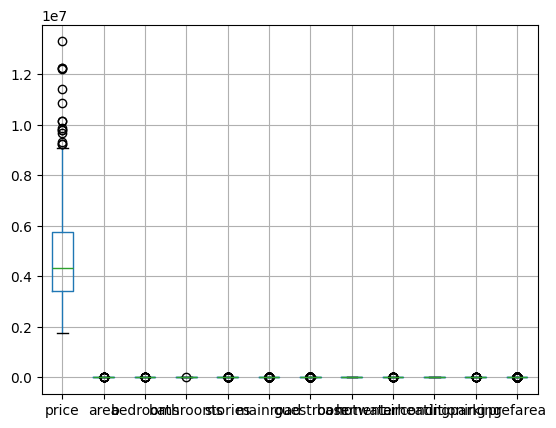

In [11]:
df.boxplot()
plt.plot()

In [13]:
scaler = StandardScaler()
df[['area','bedrooms','bathrooms', 'stories','parking']] = scaler.fit_transform(df[['area','bedrooms','bathrooms', 'stories','parking']])


In [20]:
le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

<Axes: >

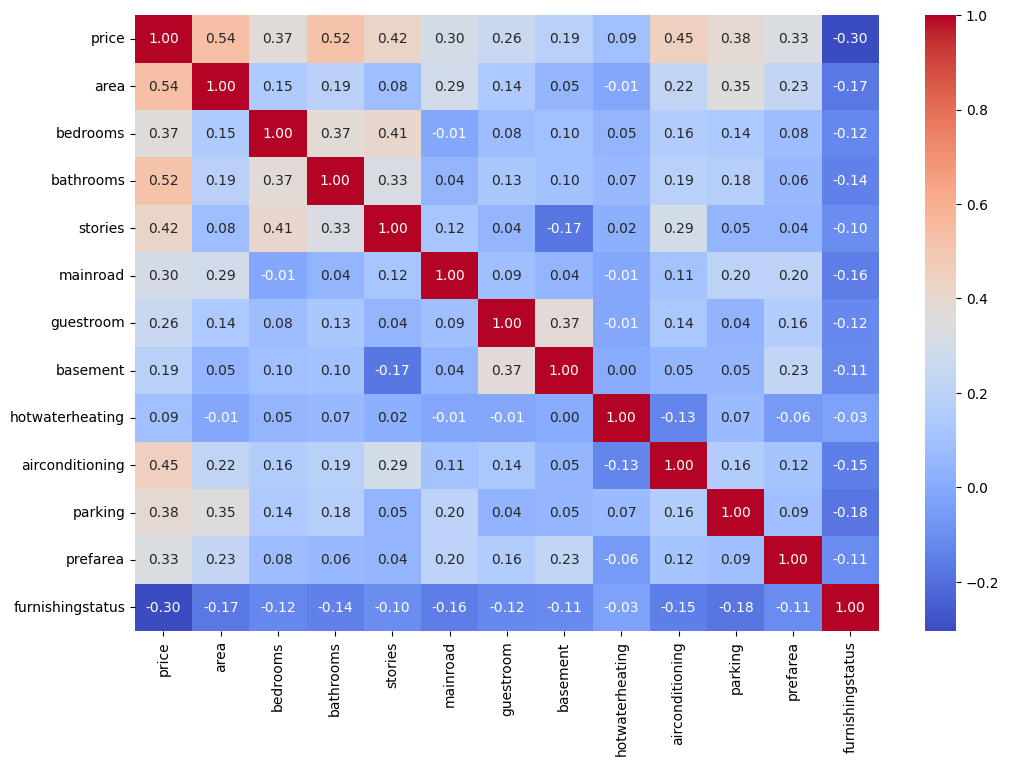

In [21]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f',cmap  = 'coolwarm')

In [23]:
X = df.drop(columns=['price'])
y = df['price']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [25]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [26]:
mlr_pred = mlr.predict(X_test)

In [27]:
mse_error = mean_squared_error(y_test,mlr_pred)
r2_err = r2_score(y_test,mlr_pred)
print("Accuracy of mean Squared error is:",mse_error)
print("Accuracy of R2 score is: ",r2_err)

Accuracy of mean Squared error is: 1771751116594.0396
Accuracy of R2 score is:  0.6494754192267795


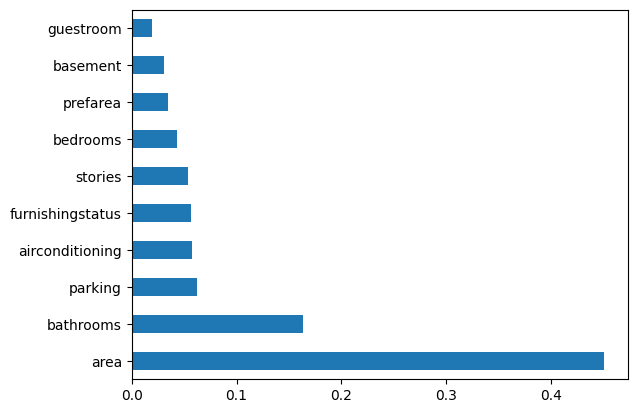

In [29]:
rf = RandomForestRegressor(n_estimators=100, random_state=47)
rf.fit(X, y)

# Plot feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [1]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestRegressor(random_state=47)
grid_search = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=20, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)


NameError: name 'RandomForestRegressor' is not defined